In [1]:
import json
from collections import Counter
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from utils import MetricCallback, plot_vectors

%matplotlib inline

In [22]:
with open('data/countries.json', 'r') as fout:
    countries = json.load(fout)

In [3]:
countries['India'][:20]

['India',
 'Hindi',
 'Bhārat',
 'officially',
 'the',
 'Republic',
 'of',
 'India',
 'Hindi',
 'Bhārat',
 'Gaṇarājya',
 'is',
 'a',
 'country',
 'in',
 'South',
 'Asia',
 'It',
 'is',
 'the']

In [4]:
print(' '.join(countries['India'])[:512] + ' ...')

India Hindi Bhārat officially the Republic of India Hindi Bhārat Gaṇarājya is a country in South Asia It is the second most populous country the seventh largest country by land area and the most populous democracy in the world Bounded by the Indian Ocean on the south the Arabian Sea on the southwest and the Bay of Bengal on the southeast it shares land borders with Pakistan to the west China Nepal and Bhutan to the north and Bangladesh and Myanmar to the east In the Indian Ocean India is in the vicinity of  ...


In [5]:
model = Word2Vec(sentences=countries.values())

In [6]:
model.wv.most_similar('India', topn=5)

[('China', 0.7934218049049377),
 ('Brazil', 0.7847306728363037),
 ('Mozambique', 0.7674211859703064),
 ('Mexico', 0.7513284683227539),
 ('Iran', 0.746879518032074)]

In [7]:
model = Word2Vec(
    sentences=countries.values(),
    compute_loss=True
)
model.get_latest_training_loss()

5848968.0

In [8]:
counter = Counter()
for words in countries.values():
    for word in words:
        counter.update([word])

print(len(counter))

93695


In [9]:
len(model.wv)

23345

In [10]:
metric = MetricCallback(every=1)
model = Word2Vec(
    sentences=countries.values(),
    vector_size=128,
    epochs=10,
    max_vocab_size=65536,
    compute_loss=True,
    callbacks=[metric]
)

Loss after epoch 0: 1552916.75
Loss after epoch 1: 1248797.75
Loss after epoch 2: 1107726.75
Loss after epoch 3: 991294.25
Loss after epoch 4: 887775.5
Loss after epoch 5: 833035.0
Loss after epoch 6: 827608.5
Loss after epoch 7: 822074.5
Loss after epoch 8: 715732.0
Loss after epoch 9: 695534.0


In [11]:
model.wv.most_similar('India')

[('China', 0.6469063758850098),
 ('Pakistan', 0.6328173279762268),
 ('Asia', 0.5696115493774414),
 ('Vietnam', 0.5691674947738647),
 ('Nepal', 0.561296820640564),
 ('Japan', 0.5591958165168762),
 ('Indonesia', 0.5584914088249207),
 ('Brunei', 0.5548993945121765),
 ('Malaysia', 0.5536627769470215),
 ('Singapore', 0.5505574941635132)]

Loss after epoch 0: 552119.875
Loss after epoch 10: 307894.25
Loss after epoch 20: 235127.0
Loss after epoch 30: 231485.0
Loss after epoch 40: 217721.0
Loss after epoch 50: 201146.0
Loss after epoch 60: 200230.0
Loss after epoch 70: 158110.0
Loss after epoch 80: 151538.0
Loss after epoch 90: 149864.0


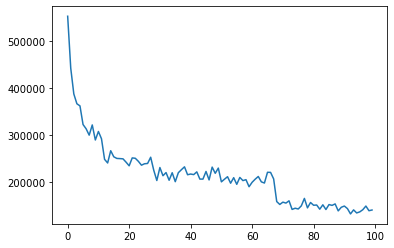

In [19]:
metric = MetricCallback(every=10)
model = Word2Vec(
    sentences=countries.values(),
    vector_size=128,
    epochs=100,
    max_vocab_size=65536,
    compute_loss=True,
    callbacks=[metric],
    min_alpha=0.001,
    workers=9
)
plt.plot(metric.myloss)

In [20]:
model.wv.most_similar('India')

[('Nepal', 0.6169068217277527),
 ('Pakistan', 0.5984105467796326),
 ('China', 0.5942568778991699),
 ('Indonesia', 0.5482887029647827),
 ('Bengal', 0.5258337259292603),
 ('Vietnam', 0.510328471660614),
 ('Bhutan', 0.5091630220413208),
 ('Singapore', 0.4965749680995941),
 ('Bangladesh', 0.493193119764328),
 ('Nigeria', 0.482102632522583)]

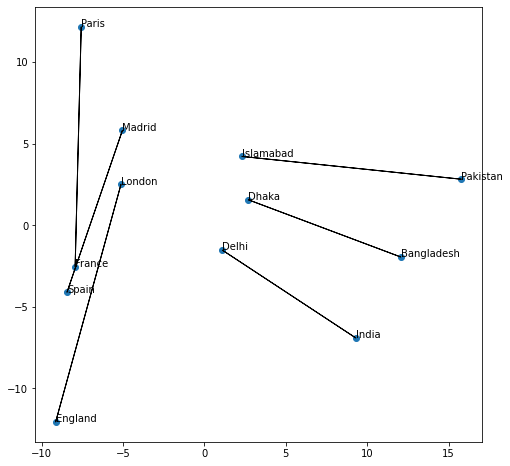

In [21]:
countries = ['India', 'Pakistan', 'Bangladesh', 'France', 'England', 'Spain']
capitals = ['Delhi', 'Islamabad', 'Dhaka', 'Paris', 'London', 'Madrid']
plot_vectors(countries, capitals, model.wv)

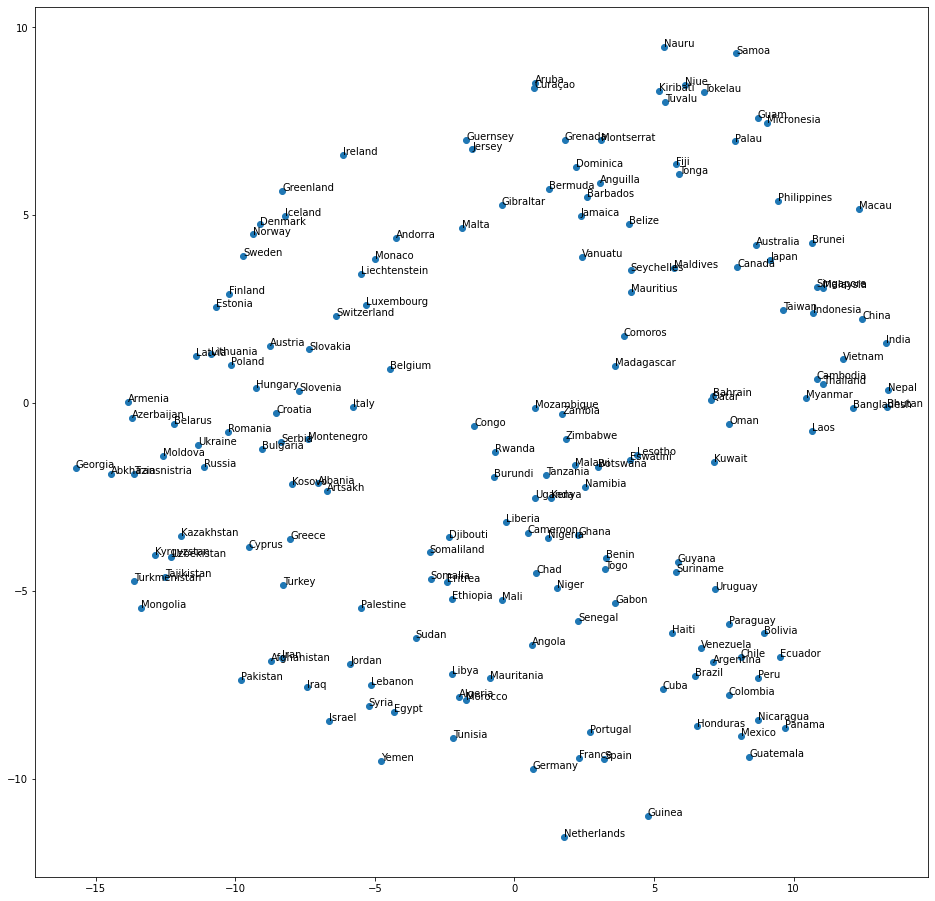

In [25]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


names = []
vectors = []
for country in countries:
    if country in model.wv:
        names.append(country)
        vectors.append(model.wv[country])

X = np.r_[vectors]
x_red = TSNE(n_components=2).fit_transform(X)
fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(*x_red.T)

for i, word in enumerate(names):
        plt.annotate(word, x_red[i])

In [29]:
model.wv.most_similar(positive=['Amazon', 'India'], negative=['Brazil'])

[('Gangetic', 0.42664462327957153),
 ('Kashmir', 0.4220551550388336),
 ('Brahmaputra', 0.4040713906288147),
 ('monsoons', 0.3989444971084595),
 ('Arabian', 0.39307957887649536),
 ('Ganges', 0.386420339345932),
 ('Bengal', 0.38349971175193787),
 ('Iranian', 0.37906333804130554),
 ('Duars', 0.36686065793037415),
 ('plate', 0.36532336473464966)]

In [49]:
model.wv.most_similar(positive=['Washington', 'France'], negative=['England'])

[('Paris', 0.41906726360321045),
 ('Ronald', 0.36477696895599365),
 ('Colombia', 0.36352577805519104),
 ('Johnson', 0.3631835877895355),
 ('conference', 0.3624561131000519),
 ('arbitration', 0.36206886172294617),
 ('Lille', 0.35697606205940247),
 ('Nguema', 0.3490712642669678),
 ('loyalist', 0.34869062900543213),
 ('Bolivar', 0.3450950086116791)]

In [57]:
model.wv.most_similar(positive=['Hindi', 'Germany'], negative=['India'])

[('German', 0.4556308090686798),
 ('Georg', 0.45349618792533875),
 ('Austrians', 0.435151070356369),
 ('Sándor', 0.38535135984420776),
 ('Poetry', 0.3724575340747833),
 ('Yiddish', 0.36927711963653564),
 ('Liszt', 0.36290109157562256),
 ('Hanna', 0.3611793518066406),
 ('abbreviated', 0.35841014981269836),
 ('composers', 0.35616225004196167)]